<a href="https://colab.research.google.com/github/esnue/ThesisAllocationSystem/blob/main/4_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of CTM output results
In this notebook, we will visualize our CTM output. 

## Import what we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.colors as mcolors

## Data
Let's import the dataframe that holds all of the relevant CTM outputs for our corpus of academic papers. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
topics_df = pd.read_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label.csv')

print(topics_df.sample(5))
print("There are ", len(topics_df.topic_id.unique()), "topics in total.")

                     prof  ...                                       distribution
461             cis26.txt  ...  [0.0271460801246576, 0.018349743215367198, 0.0...
574  Mungiu-Pippidi30.txt  ...  [0.09766255738213658, 0.02841243763687089, 0.0...
571  Mungiu-Pippidi26.txt  ...  [0.018741169149429866, 0.02175863759787413, 0....
318          Hassel32.txt  ...  [0.02252316160593182, 0.0638505607843399, 0.03...
150         Costello3.txt  ...  [0.021206064120633528, 0.016523351171053947, 0...

[5 rows x 4 columns]
There are  14 topics in total.


## Create wide & long format

In [4]:
# Extract list of topic proportions 
list_prop = topics_df.iloc[:,3]

# Convert to float array
ar_float = np.array([[float(i) for i in j[1:-1].split(', ')] for j in list_prop])

# Create col labels 
topics = []
for i in list(range(0, 14)):
     topics.append('Topic' + str(i))

# Add col labels to float array
topiclab_df = pd.DataFrame(data = ar_float, columns=topics)
topiclab_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.761311,0.057480,0.018308,0.005360,0.011729,0.009344,0.008888,0.053072,0.003732,0.012903,0.011730,0.006997,0.034081,0.005064
1,0.546687,0.083571,0.055169,0.032054,0.032806,0.020551,0.024105,0.038918,0.031414,0.014969,0.020595,0.015033,0.026796,0.057330
2,0.081703,0.018837,0.033404,0.071922,0.045205,0.291806,0.025276,0.013646,0.078218,0.237980,0.016144,0.049807,0.011770,0.024281
3,0.775538,0.127827,0.009821,0.004559,0.012252,0.007293,0.006242,0.021990,0.002604,0.007097,0.007869,0.005649,0.007621,0.003639
4,0.670124,0.035505,0.022101,0.016260,0.025384,0.016416,0.014526,0.046487,0.009201,0.016545,0.041123,0.013186,0.033493,0.039648


In [5]:
# Change col name 
topics_df.rename(columns={"topic": "topic_words"}, inplace = True)

# Append wide format to topics_df
topics_df_wide = pd.concat([topics_df.iloc[:, 0:3], topiclab_df], axis = 1)

# Reshape to long format
topics_df_long = topics_df_wide.melt(id_vars = ['prof', 'topic_id', 'topic_words'],
                                     var_name = 'topic',
                                     value_name = 'topic_prop')

In [6]:
print("This is the wide format.\n", topics_df_wide.head(5))
print("This is the long format.\n", topics_df_long.head(5))

This is the wide format.
                 prof  topic_id  ...   Topic12   Topic13
0  Hammerschmid1.txt         0  ...  0.034081  0.005064
1  Hammerschmid2.txt         0  ...  0.026796  0.057330
2  Hammerschmid3.txt         5  ...  0.011770  0.024281
3  Hammerschmid4.txt         0  ...  0.007621  0.003639
4  Hammerschmid5.txt         0  ...  0.033493  0.039648

[5 rows x 17 columns]
This is the long format.
                 prof  topic_id  ...   topic topic_prop
0  Hammerschmid1.txt         0  ...  Topic0   0.761311
1  Hammerschmid2.txt         0  ...  Topic0   0.546687
2  Hammerschmid3.txt         5  ...  Topic0   0.081703
3  Hammerschmid4.txt         0  ...  Topic0   0.775538
4  Hammerschmid5.txt         0  ...  Topic0   0.670124

[5 rows x 5 columns]


In [ ]:
# Save wide and long formats 
topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_wide.csv', index = False)
topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_long.csv', index = False)

## Stacked Bar Chart

In [14]:
topics_df_wide.iloc[:, 4:31]

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.057480,0.018308,0.005360,0.011729,0.009344,0.008888,0.053072,0.003732,0.012903,0.011730,0.006997,0.034081,0.005064
1,0.083571,0.055169,0.032054,0.032806,0.020551,0.024105,0.038918,0.031414,0.014969,0.020595,0.015033,0.026796,0.057330
2,0.018837,0.033404,0.071922,0.045205,0.291806,0.025276,0.013646,0.078218,0.237980,0.016144,0.049807,0.011770,0.024281
3,0.127827,0.009821,0.004559,0.012252,0.007293,0.006242,0.021990,0.002604,0.007097,0.007869,0.005649,0.007621,0.003639
4,0.035505,0.022101,0.016260,0.025384,0.016416,0.014526,0.046487,0.009201,0.016545,0.041123,0.013186,0.033493,0.039648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.087523,0.044263,0.024575,0.063884,0.030713,0.056769,0.076277,0.015310,0.025569,0.033842,0.024708,0.194195,0.038309
805,0.010572,0.026055,0.023941,0.024507,0.035897,0.007052,0.124567,0.014115,0.028932,0.107249,0.051610,0.449391,0.048878
806,0.036570,0.043192,0.086792,0.067944,0.041886,0.026488,0.118018,0.103172,0.037033,0.031321,0.024530,0.158282,0.040524
807,0.066559,0.032286,0.028446,0.049417,0.035247,0.023898,0.139395,0.023011,0.048894,0.047934,0.061900,0.259467,0.063656


In [7]:
# Confirm percentage distribution by summing the percentages in each topic
topics_df_wide.iloc[:, 4:31].sum(axis=1) 

0      0.238689
1      0.453313
2      0.918297
3      0.224462
4      0.329876
         ...   
804    0.715937
805    0.952766
806    0.815752
807    0.880109
808    0.981199
Length: 809, dtype: float64

In [66]:
# Remove number and .txt from prof
topics_df_wide['prof'] = topics_df_wide['prof'].str.replace('[0-9]', '').str.replace('\.txt', '').str.upper()

# Create bar chart df 
bardat1 = pd.concat([topics_df_wide['prof'], topics_df_wide.iloc[:, 3:31]], axis = 1)

In [67]:
# Solution 1: Average topic proportions per professor 
bardat2 = bardat1.groupby('prof').mean().reset_index()
print(bardat2.head(5))

        prof    Topic0    Topic1  ...   Topic11   Topic12   Topic13
0    ANHEIER  0.186823  0.059203  ...  0.032670  0.059333  0.027762
1     BRYSON  0.059318  0.032181  ...  0.066458  0.043419  0.079759
2       CALI  0.018110  0.009559  ...  0.012739  0.012505  0.011679
3  CINGOLANI  0.125993  0.068655  ...  0.036453  0.063086  0.085083
4        CIS  0.042938  0.031070  ...  0.030610  0.032677  0.031447

[5 rows x 15 columns]


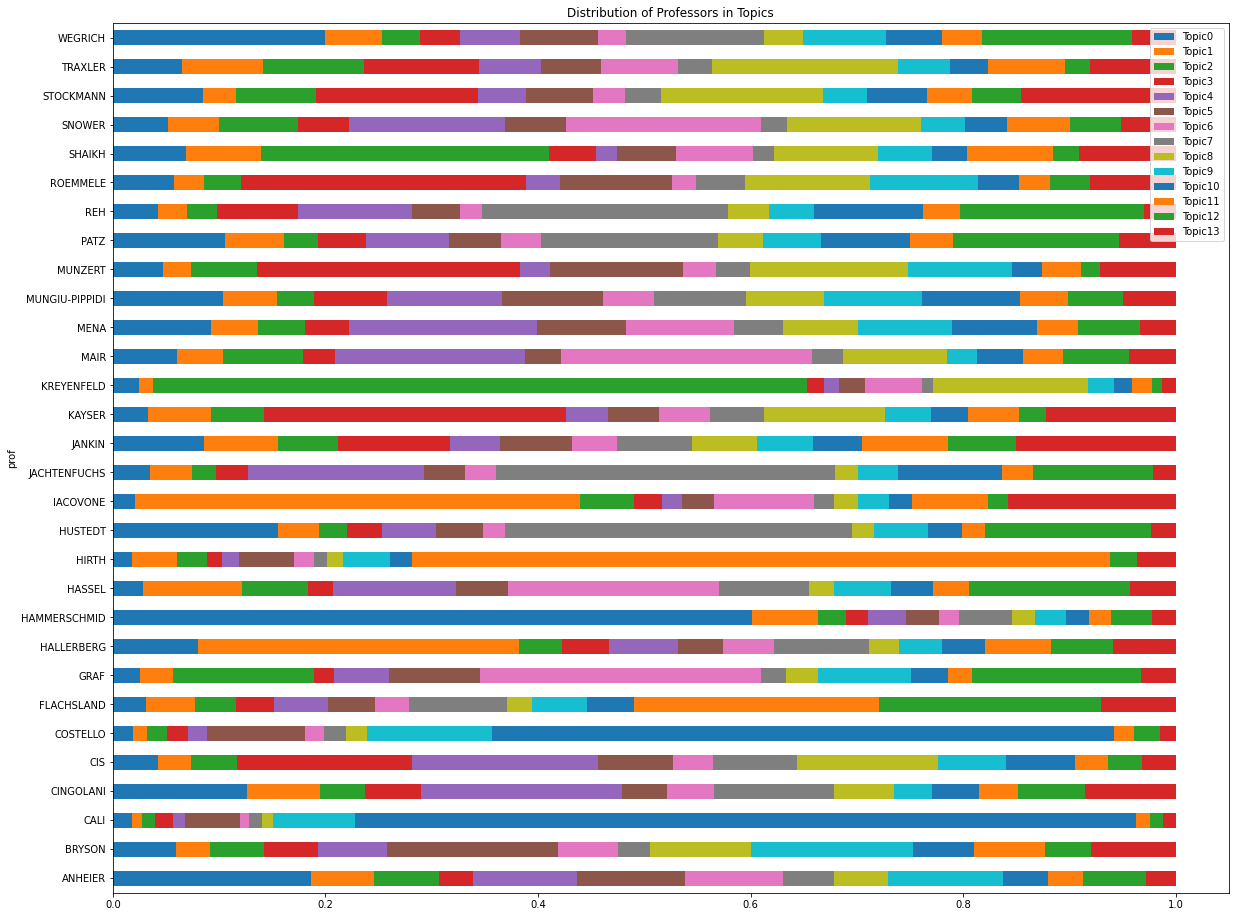

In [79]:
plt.rcParams["figure.figsize"] = [20,16]
bardat2.plot(
    x = 'prof',
    kind = 'barh',
    stacked = True,
    title = 'Distribution of Professors in Topics',
    mark_right = True)

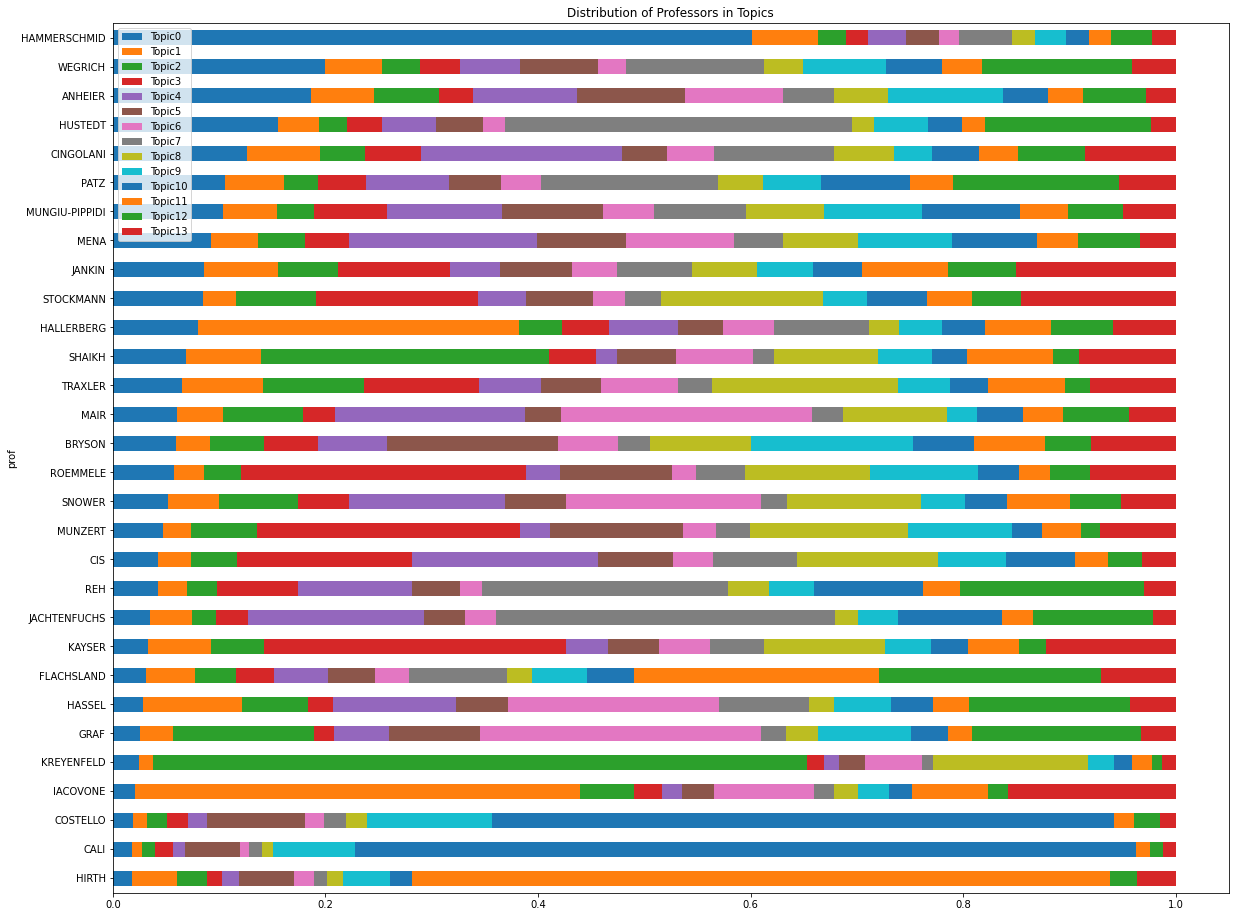

In [81]:
# Sort by topics
bardat2 = bardat2.sort_values('Topic0')
plt.rcParams["figure.figsize"] = [20,16]
bardat2.plot(
    x = 'prof',
    kind = 'barh',
    stacked = True,
    title = 'Distribution of Professors in Topics',
    mark_right = True)


## Bar Chart: Word Counts of Topic Keywords

In [83]:
topics_df_long.head(5)

,prof,topic_id,topic_words,topic,topic_prop
0,Hammerschmid1.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic0,0.761311
1,Hammerschmid2.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic0,0.546687
2,Hammerschmid3.txt,5,"['ed', 'art', 'component', 'come', 'received',...",Topic0,0.081703
3,Hammerschmid4.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic0,0.775538
4,Hammerschmid5.txt,0,"['sector', 'public', 'management', 'npublic', ...",Topic0,0.670124


In [ ]:
#from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
# Plot Word Count and Weights of Topic Keywords
topics = topics_df["topic_words"]
topic_id = topics_df["topic_id"]
dist = topics_df["distribution"]

#too many loops -> breaks RAM 
out = []
for word in topics:
    for d in dist:
      for i in topic_id:
          out.append([word, dist, i]) #we don't have word count from the CTM -> could it be added?


df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()